In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv(r"D:\AI\Beta\insurance-data.csv")
df.head()
## no usless features

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df.duplicated().sum()
### one duplicated can be removed
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


*started univariant numrical analysis*

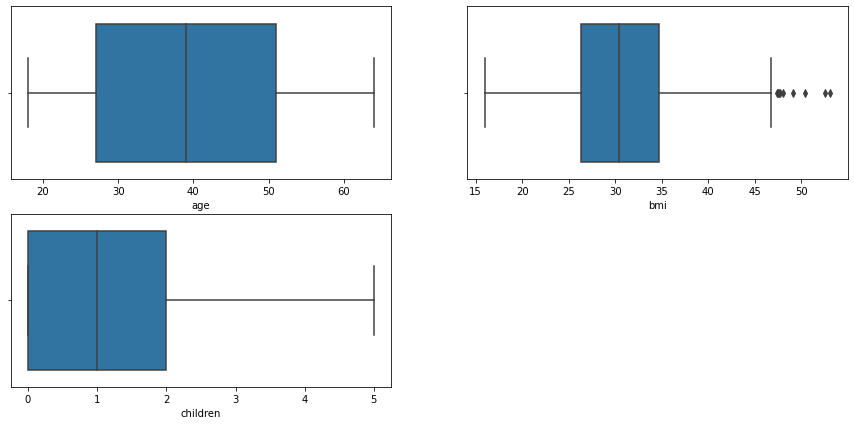

In [6]:
### BOXPLOT to see outliers & to sence distribution
plt.figure(figsize=[15,7])
plt.subplot(2,2,1)
sns.boxplot(x=df['age'])
#plt.subplot(2,2,2)
#sns.boxplot(x=df['sex'])
plt.subplot(2,2,2)
sns.boxplot(x=df['bmi'])
plt.subplot(2,2,3)
sns.boxplot(x=df['children']);
## bmi has some outliers

*univariant catagorical analysis*

<AxesSubplot:xlabel='region', ylabel='count'>

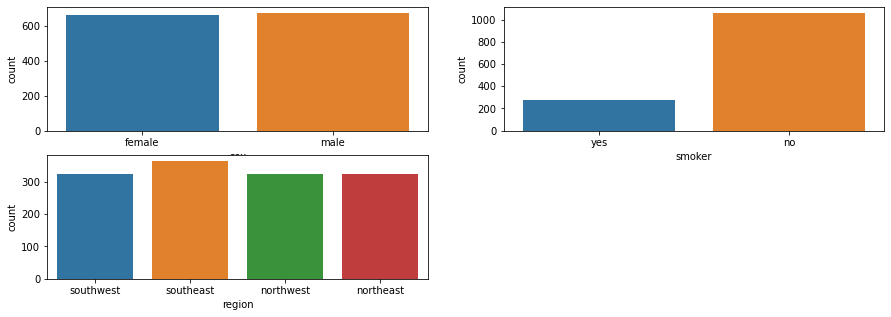

In [7]:
plt.figure(figsize=[15,5])
plt.subplot(2,2,1)
sns.countplot(x=df['sex'])
plt.subplot(2,2,2)
sns.countplot(x=df['smoker'])
plt.subplot(2,2,3)
sns.countplot(x=df['region'])

*drop inimportant rows*

In [8]:
df = df[df["bmi"] < 47] ## outliers
#sns.boxplot(x=df['bmi'])

*encoding catagorical data*

In [9]:
## one hot encoding
df=pd.get_dummies(df,columns=['sex','smoker','region'])
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [10]:
df.corr()['charges']
## corr with target only

age                 0.301317
bmi                 0.193270
children            0.069125
charges             1.000000
sex_female         -0.064161
sex_male            0.064161
smoker_no          -0.785896
smoker_yes          0.785896
region_northeast    0.009342
region_northwest   -0.036482
region_southeast    0.071191
region_southwest   -0.046341
Name: charges, dtype: float64

*standrizing data of ranges > [0,9] .*

In [11]:
scaler = MinMaxScaler()
df[['age', 'bmi']] = scaler.fit_transform(df[['age', 'bmi']])
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0.387788,0,16884.92400,1,0,0,1,0,0,0,1
1,0.000000,0.578435,1,1725.55230,0,1,1,0,0,0,1,0
2,0.217391,0.553426,3,4449.46200,0,1,1,0,0,0,1,0
3,0.326087,0.219065,0,21984.47061,0,1,1,0,0,1,0,0
4,0.304348,0.419617,0,3866.85520,0,1,1,0,0,1,0,0


In [12]:
#### rearrage columns to put target at end
df=df[['age','bmi','children','sex_female','sex_male','smoker_no','smoker_yes','region_northeast','region_northwest','region_southeast','region_southwest','charges']]
df.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,0.021739,0.387788,0,1,0,0,1,0,0,0,1,16884.92400
1,0.000000,0.578435,1,0,1,1,0,0,0,1,0,1725.55230
2,0.217391,0.553426,3,0,1,1,0,0,0,1,0,4449.46200
3,0.326087,0.219065,0,0,1,1,0,0,1,0,0,21984.47061
4,0.304348,0.419617,0,0,1,1,0,0,1,0,0,3866.85520


*childrens column is in rage [0,5] so it can be used as it's* 
*but if you want it to be scaled to run the folloing cell :)*

In [ ]:
scaler = MinMaxScaler()
df[['children']] = scaler.fit_transform(df[['children']])
df.head()